In [1]:
import pandas as pd
import os.path
import numpy as np
import travel_matrix as tmx
import store_n_load as snl
import time
import plotly.express as px
import seaborn as sns

In [2]:
def read_data(nrows):
    abs_path = os.path.abspath('travel_matrix.py')
    directory = os.path.dirname(abs_path)
    save_path = directory
    file_name = 'example_data'
    extension = '.xlsx'
    complete_path = os.path.join(save_path, file_name+extension)
    xfile = pd.ExcelFile(complete_path)
    activity_data = pd.read_excel(xfile, 'activity_data', nrows=nrows)
    return activity_data

In [3]:
df = read_data(nrows=None)
print(df.head())
size = df.shape[0]
print(size)
lat = df.latitude
lon = df.longitude

   activity_id  client_nr shift_code  shift_id  duration  tw_start  tw_end  \
0            1    2000140  AVP1-2233         0         5       NaN     NaN   
1            2     705026  AVP1-2233         0         5       NaN     NaN   
2            3     705026  AVP1-2233         0        10       NaN     NaN   
3            4     811647  AVP1-2233         0        10       NaN     NaN   
4            5     819573  AVP1-2233         0        15       NaN     NaN   

   tw_bool activity_level_name  activity_level   latitude  longitude  
0        0               PV 2+               2  52.269695   6.164124  
1        0                PV 3               3  52.267812   6.175048  
2        0               PV 2+               2  52.266598   6.168108  
3        0               PV 2+               2  52.269764   6.176036  
4        0               PV 2+               2  52.267690   6.166916  
87


In [4]:
path = None
tic = time.perf_counter()
tm_osrm = tmx.travel_matrix(size, lat, lon, path)
toc = time.perf_counter()
print(f'Calculated travel matrix in {toc - tic:0.4f} seconds')
print(tm_osrm[0])
print(tm_osrm.__class__.__name__)
fn = "travel_matrix_osrm"
sp = os.path.abspath(os.getcwd())
snl.store(tm_osrm, fn, sp)

computing travel times...
using osrm
computation finished
Calculated travel matrix in 3740.6679 seconds
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
list


In [5]:
path = "deventer_graph_s.graphml"
tic = time.perf_counter()
tm_osmnx = tmx.travel_matrix(size, lat, lon, path)
toc = time.perf_counter()
print(f'Calculated travel matrix in {toc - tic:0.4f} seconds')
print(tm_osmnx[0])
print(tm_osmnx.__class__.__name__)
fn = "travel_matrix_osmnx"
sp = os.path.abspath(os.getcwd())
snl.store(tm_osmnx, fn, sp)

computing travel times...
using osmnx
computation finished
Calculated travel matrix in 139.3415 seconds
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
list


In [6]:
m1, m2, d, f, n = tmx.matrix_dev(tm_osrm, tm_osmnx)
print(f'Norm={n},\nRelDiff={f}')

Norm=15710.816134976376,
RelDiff=[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan 1.3213308  ... 0.9367459  0.96258365 0.93108572]
 [       nan 1.29698507        nan ... 1.10031913 1.04766081 1.17193799]
 ...
 [       nan 0.85982773 1.10134463 ...        nan 1.08377437 1.12375854]
 [       nan 0.94893782 1.04196945 ... 1.08377437        nan 1.31166024]
 [       nan 0.84645017 1.09620648 ... 1.12375854 1.3541835         nan]]


/Users/witoldtenhove/Documents/Projects/vu/buur/gomea/travel_matrix.py:137: RuntimeWarning: divide by zero encountered in true_divide
  F = M1/M2
/Users/witoldtenhove/Documents/Projects/vu/buur/gomea/travel_matrix.py:137: RuntimeWarning: invalid value encountered in true_divide
  F = M1/M2


In [7]:
relative_diff = np.matrix.flatten(f)
print(np.nanmean(relative_diff))

inf


In [8]:
df = pd.DataFrame(relative_diff, columns=['Relative'])
fig = px.histogram(df, x="Relative", marginal="rug")
fig.show()

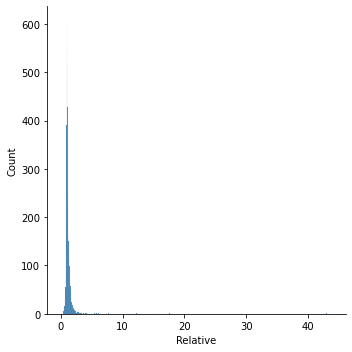

In [9]:
sns.displot(df, x="Relative")

In [10]:
path = "deventer_graph.graphml"
tic = time.perf_counter()
tm_osmnx = tmx.travel_matrix(size, lat, lon, path)
toc = time.perf_counter()
print(f'Calculated travel matrix in {toc - tic:0.4f} seconds')
print(tm_osmnx[0])
print(tm_osmnx.__class__.__name__)
fn = "travel_matrix_osmnx"
sp = os.path.abspath(os.getcwd())
snl.store(tm_osmnx, fn, sp)
mx_d = tmx.matrix_dev(tm_osrm, tm_osmnx)
m1, m2, d, f, n = tmx.matrix_dev(tm_osrm, tm_osmnx)
print(f'Norm={n},\nRelDiff={f}')


computing travel times...
using osmnx
computation finished
Calculated travel matrix in 682.4266 seconds
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
list
Norm=11737.988754385524,
RelDiff=[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan 1.06886665 ... 1.04944436 1.17365537 1.00976552]
 [       nan 1.06977721        nan ... 1.05066127 1.02499131 1.08802489]
 ...
 [       nan 1.04944436 1.05204175 ...        nan 1.00629984 1.02616586]
 [       nan 1.19412125 1.02384294 ... 1.00629984        nan 1.23060228]
 [       nan 1.00976552 1.0125687  ... 1.02616586 1.23473475        nan]]


/Users/witoldtenhove/Documents/Projects/vu/buur/gomea/travel_matrix.py:137: RuntimeWarning:

divide by zero encountered in true_divide

/Users/witoldtenhove/Documents/Projects/vu/buur/gomea/travel_matrix.py:137: RuntimeWarning:

invalid value encountered in true_divide



In [11]:
relative_diff = np.matrix.flatten(f)
np.nanmean(relative_diff)

inf

In [12]:
df = pd.DataFrame(relative_diff, columns=['Relative'])
fig = px.histogram(df, x="Relative", marginal="rug")
fig.show()

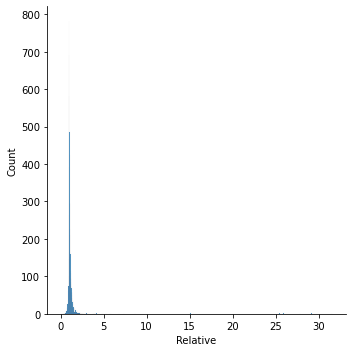

In [13]:
sns.displot(df, x="Relative")